In [20]:
from math import log, sqrt
from numpy import mean, std

def logScaling(values):
    """ 
    Log scaling computes the log of your values to compress a wide range to a narrow range.
    """
    logValues = [log(v) for v in values]
    return logValues


def minMaxScaling(values):
    """ 
    Converting floating-point feature values from their natural range into a standard range
    """
    valuesScale = [(v - min(values)) / (max(values) - min(values)) for v in values]
    return valuesScale

def zNormalisation(values):
    """ 
    The result of standardization is that the features will be rescaled 
    so that they will have the properties of a standard normal distribution 
    """
    valuesZNormalisation = [(v - mean(values)) / std(values) for v in values]
    return valuesZNormalisation

def L2Normalisation(values):
    """ 
    L2 Normalisation of the given values
    """
    L2Norm = sqrt(sum(v**2 for v in values))
    valuesL2Normalisation = [v/L2Norm for v in values]
    return valuesL2Normalisation


In [21]:
import pandas as pd 
import numpy as np

def readFromFile(file_path):
    """
    Reads data from a file with the given path and returns a data frame that contains the records from the path
    file_path: a file's path
    return: data frame
    """
    dataFrame = pd.read_csv(file_path, delimiter=',', header='infer')
    return dataFrame

In [22]:
import matplotlib.pyplot as plt

def pb1SalaryMinMaxScaling(employees):
    """ 
    Applying the Min Max scaling for the Salaries of employees
    """
    salaries = employees["Salary"]
    return minMaxScaling(salaries)

def pb1SalaryMinMaxScalingHistogram(employees):
    """ 
    Applying the Min Max scaling for the Salaries of employees and showing the result on a histogram
    """
    salaries = employees['Salary']
    values = pb1SalaryMinMaxScaling(employees)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.hist(salaries)
    ax1.set_title('BEFORE SALARY')
    ax2.hist(values)
    ax2.set_title('AFTER SALARY')
    plt.show()

In [23]:
def pb1BonusMinMaxScaling(employees):
    """ 
    Applying the Min Max scaling for the bonus of employees
    """
    bonus = employees["Bonus %"]
    return minMaxScaling(bonus)

def pb1BonusMinMaxScalingHistogram(employees):
    """ 
    Applying the Min Max scaling for the Bonus of employees and showing the result on a histogram
    """
    bonus = employees['Bonus %']
    values = pb1BonusMinMaxScaling(employees)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.hist(bonus)
    ax1.set_title('BEFORE BONUS')
    ax2.hist(values)
    ax2.set_title('AFTER BONUS')
    plt.show()

In [33]:
def numberOfPeopleForEachTeam(employees):
    """ 
    Returns a dictionary that has the team's name as keys and the number of employees per team as values
    """
    dictionary = {}
    teams = employees.dropna()["Team"]
    for team in teams:
        if team in dictionary.keys():
            dictionary[team] += 1
        else:
            dictionary[team] = 1
    
    values = [v for v in dictionary.values()]
    return values


def pb1TeamZNormalisationScaling(employees):
    """ 
    Applying the Z normalisation for the teams of employees
    """
    peoplePerTeam = numberOfPeopleForEachTeam(employees)
    return zNormalisation(peoplePerTeam)

def pb1TeamZNormalisationScalingHistogram(employees):
    """ 
    Applying the Z normalisation for the teams of employees and showing the result on a histogram
    """
    peoplePerTeam = numberOfPeopleForEachTeam(employees)
    values = pb1TeamZNormalisationScaling(employees)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.hist(peoplePerTeam)
    ax1.set_title('BEFORE TEAM')
    ax2.hist(values)
    ax2.set_title('AFTER TEAM')
    plt.show()

In [45]:
import glob
from numpy import min, max
from PIL import Image

def pb2ZNormalisation(imageDirectoryPath):
    """ 
    Applying the Z normalisation on the pixels of all images in the given directory
    """
    for imagePath in glob.glob(imageDirectoryPath):
        image = Image.open(imagePath)
        newImage = (image - mean(image)) / std(image)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
        ax1.imshow(image)
        ax1.set_title('BEFORE')
        ax2.imshow(newImage)
        ax2.set_title('AFTER')
        plt.show()



In [61]:
import nltk

def wordAppearencesInASentence(sentence):
    """ 
    Returns a dictionary where the keys are distinct words and the values are the number of appereances for each word in a sentence
    """
    wordAppearences = {}
    words = nltk.word_tokenize(sentence)
    words = [word for word in words if word.isalnum()]
    for word in words:
        if word in wordAppearences.keys():
            wordAppearences[word] += 1
        else:
            wordAppearences[word] = 1
    
    return wordAppearences


def wordAppearencesInASentenceL2Normalisation(sentence):
    """ 
    Apply the L2 normalisation for the word appeareances in a sentence
    """
    dictionary = wordAppearencesInASentence(sentence)
    values = [v for v in dictionary.values()]
    words = [w for w in dictionary.keys()]
    values2 = L2Normalisation(values)

    figure, (ax1,ax2) = plt.subplots(2,1, figsize=(20,20))

    ax1.bar(range(len(words)), values, align='center', width=0.7)
    ax1.set_xticks(range(len(words)),words)

    ax2.bar(range(len(words)), values2, align='center', width=0.7)
    ax2.set_xticks(range(len(words)),words)

    plt.show()


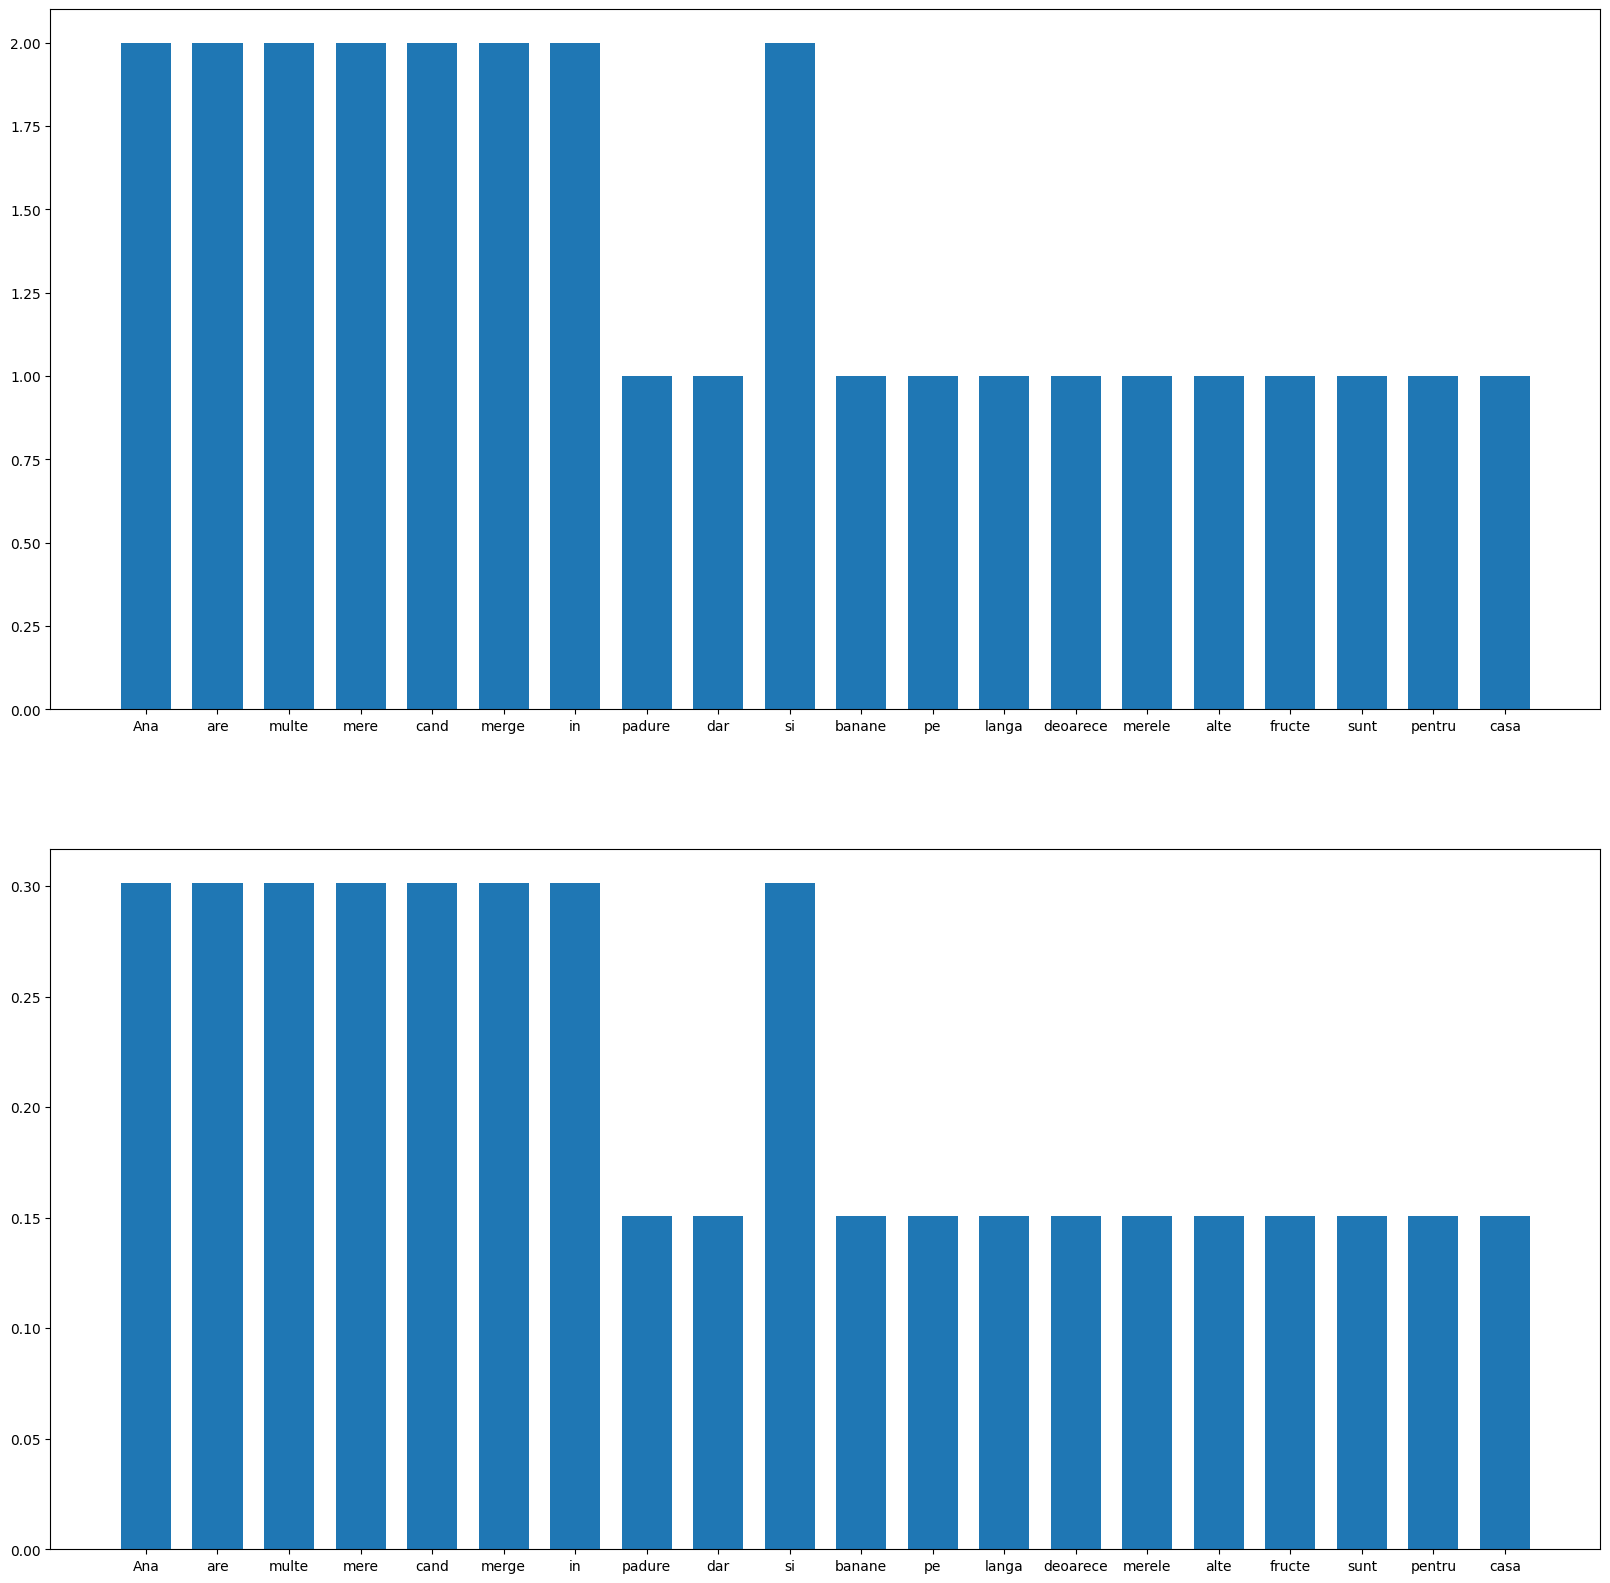

In [62]:
def main():
    #PROBLEMA 4
    employees = readFromFile('employees.csv')

    #NORMALIZARE PB1 - salariul
    # pb1SalaryMinMaxScalingHistogram(employees)

    #NORMALIZARE PB1 - bonus
    # pb1BonusMinMaxScalingHistogram(employees)

    #NORMALIZARE PB1 - team
    # pb1TeamZNormalisationScalingHistogram(employees)

    #NORMALIZARE PB2 - valorile pixelilor din imagini
    # pb2ZNormalisation("data_images/*")

    #NORMALIZARE PB3 - numarul de aparitii a cuvintelor la nivelul unei propozitii.
    wordAppearencesInASentenceL2Normalisation("Ana are multe mere cand merge in padure, dar are si multe banane pe langa mere, deoarece merele si alte fructe sunt pentru Ana cand merge in casa.")
    
    

main()